In [116]:
from matplotlib import pyplot as plt
from joblib import load
import numpy as np
from sklearn.decomposition import PCA
from umda.compute import cosine_similarity
from sklearn.metrics import pairwise_distances

plt.style.use("publication")

In [106]:
embedder = load("../../models/EmbeddingModel.pkl")

# get rid of the pipeline
# embedder._transform = None

In [107]:
smiles = ["CC#N", "CC#C", "C#CC#CC#N", "C1=C=C=C=C=C1", "C(C(=O)O)N", "C1=CC2=CC3=CC=C(N3)C=C4C=CC(=N4)C=C5C=CC(=N5)C=C1N2", "C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC(=C36)C=C2", "C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23"]
vectors = np.vstack([embedder.vectorize(smi) for smi in smiles])

In [108]:
names = ["Methyl cyanide", "Methyl acetylene", "HC$_5$N", "Benzene", "Glycine", "Porphyrin", "Corannulene", "C$_{60}$"]

In [101]:
embedder._transform = None

In [113]:
cosine_similarity(embedder.vectorize("C#CC#CC#N") - embedder.vectorize("[C]#N"), embedder.vectorize("C#CC#[C]"))

-0.019033027368854608

In [120]:
similarities = np.array([cosine_similarity(vectors[0,:], vec) for vec in vectors])

In [121]:
sorting = np.argsort(similarities)[::-1]

In [124]:
distances = np.sum(np.square(vectors - vectors[0,:]), axis=1)

In [135]:
similarities, distances

(array([ 1.        ,  0.97350082,  0.90791756,  0.81705924,  0.91292684,
        -0.12512583,  0.02717543, -0.43548735]),
 array([    0.        ,    21.94504115,    86.80565464,   169.23632648,
           67.39796952,  1045.78220507,   890.83215654, 10495.71568014]))

In [137]:
distances[sorting]

array([    0.        ,    21.94504115,    67.39796952,    86.80565464,
         169.23632648,   890.83215654,  1045.78220507, 10495.71568014])

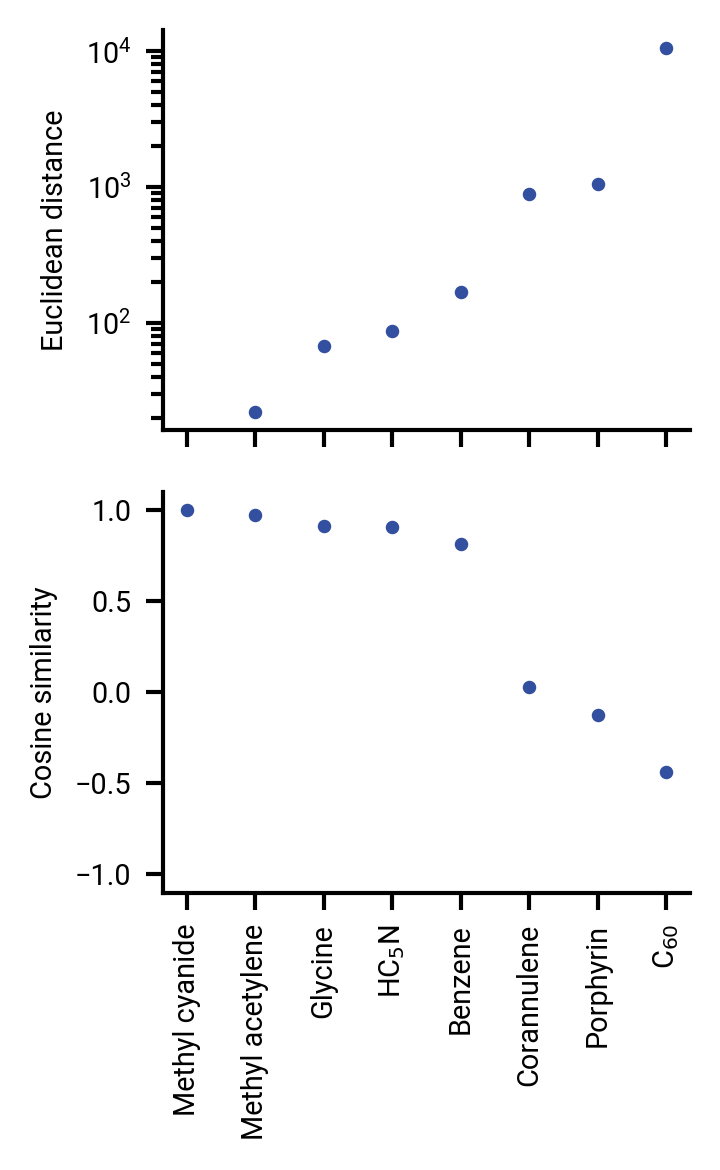

In [133]:
fig, axarray = plt.subplots(2, 1, figsize=(2.5, 4.), sharex=True)

ax = axarray[0]
ax.scatter(np.arange(len(vectors)), distances[sorting], s=5)
ax.set(yscale="log", ylabel="Euclidean distance")

ax = axarray[1]
ax.scatter(np.arange(len(vectors)), similarities[sorting], s=5)
ax.set_xticks(np.arange(len(vectors)))
ax.set_xticklabels([names[i] for i in sorting], rotation=90.)
ax.set(ylabel="Cosine similarity", ylim=[-1.1, 1.1])
fig.savefig("../../reports/figures/cosine_similarity.pdf", dpi=300)